## Introduction

In this notebook, we perform Exploratory Data Analysis (EDA) on the Titanic Dataset to understand patterns, trends, and relationships among variables using visualizations and statistics. EDA helps us prepare the data for machine learning models by identifying missing values, outliers, skewness, correlations, and more.


# AI & ML Internship - Task 2: Exploratory Data Analysis (EDA)

## 📌 Objective:
Perform EDA on the Titanic dataset to extract insights using statistical and visual techniques.

## ✅ Key Steps:
- Summary statistics
- Histograms and Boxplots
- Correlation matrix and heatmap
- Pairplot analysis
- Skewness detection
- Multicollinearity check using VIF
- Final insights

## 🧰 Libraries Used:
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Plotly
- Statsmodels

## 📈 Results:
The analysis revealed valuable trends such as class-wise survival rates, gender impact on survival, and patterns in fare and age distributions.

## 📁 Files Included:
- Titanic cleaned dataset
- EDA Notebook (`TASK-2_EDA_Titanic.ipynb`)
- README.md

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline


In [2]:
df = pd.read_csv('Titanic-Dataset (Task 2).csv') 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Age ranges from 0.42 to 80.
- Fare ranges significantly, showing some outliers.
- Majority of passengers embarked from Southampton.


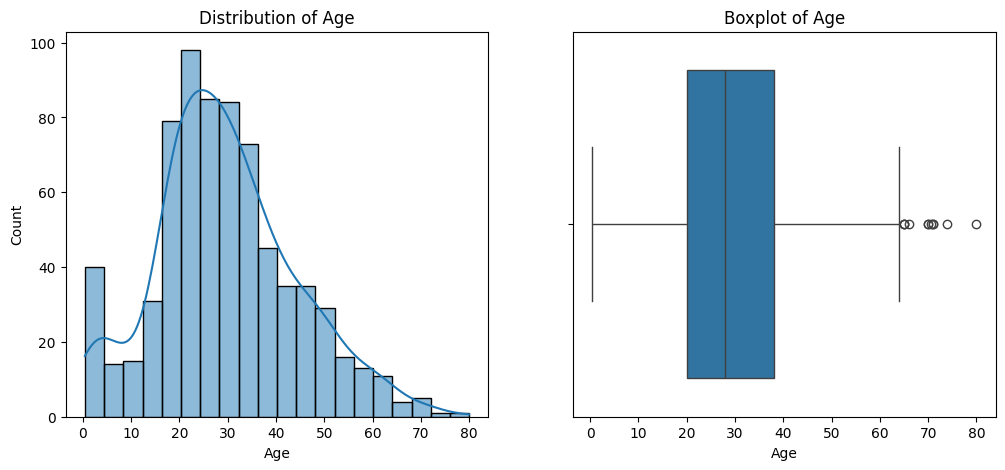

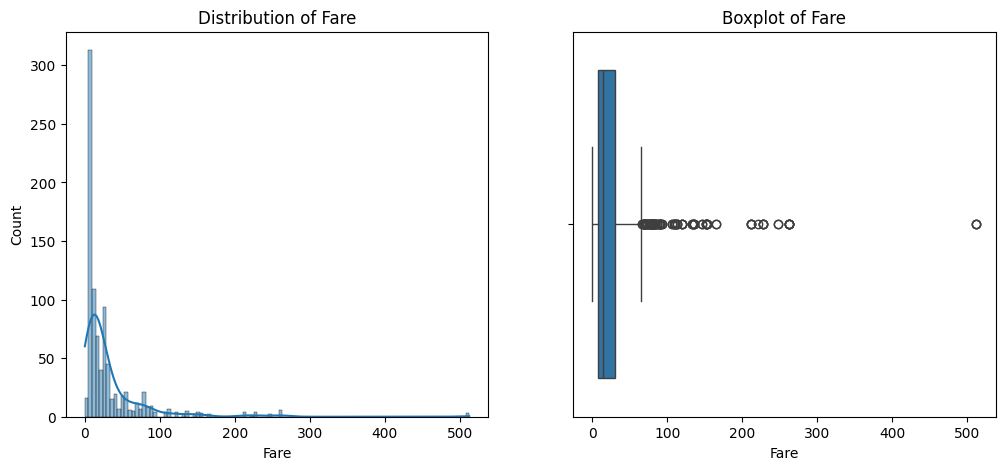

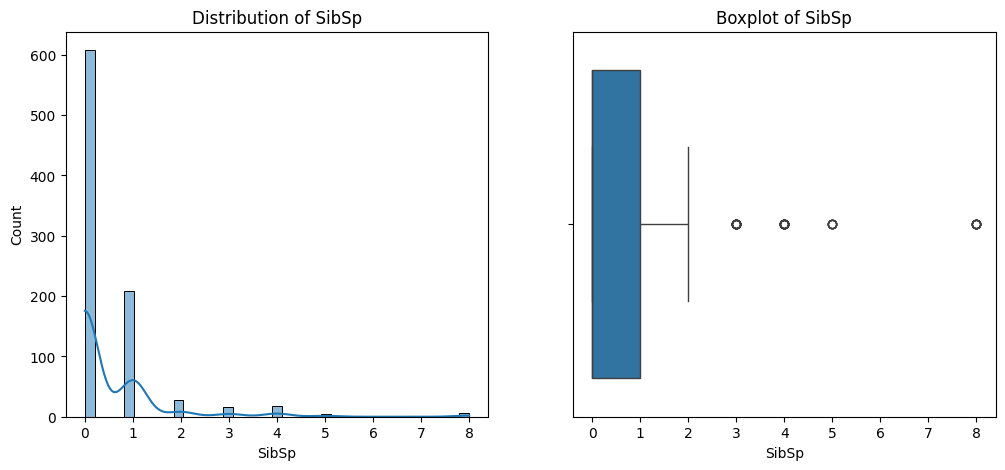

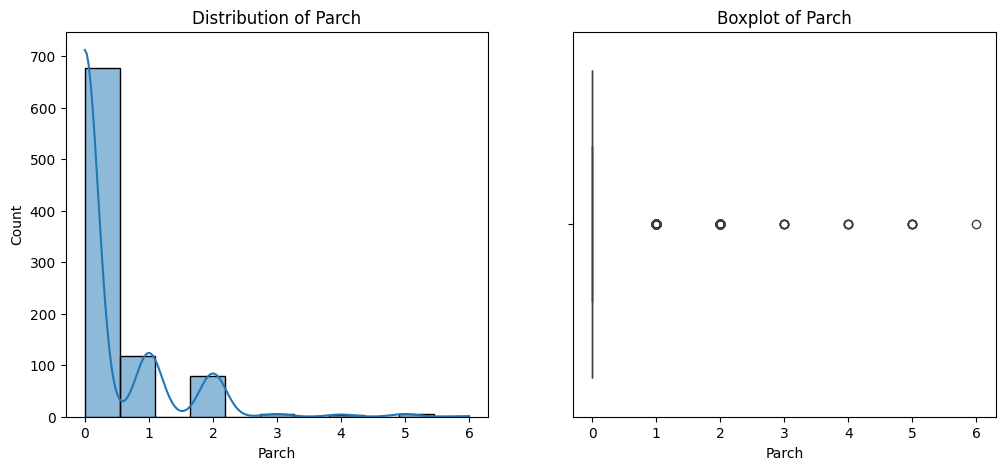

In [4]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


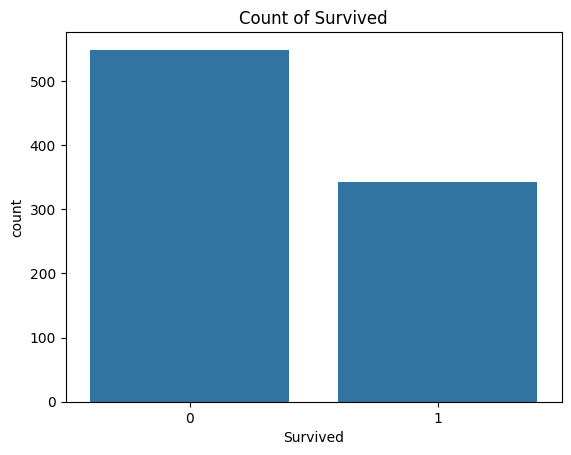

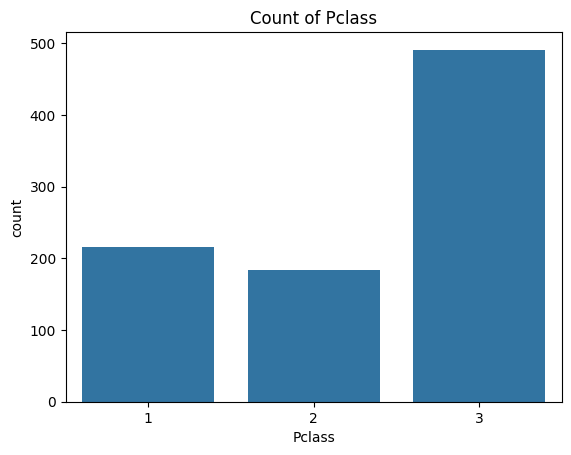

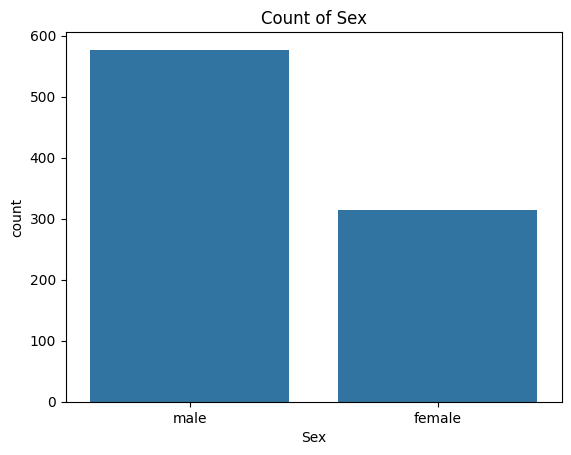

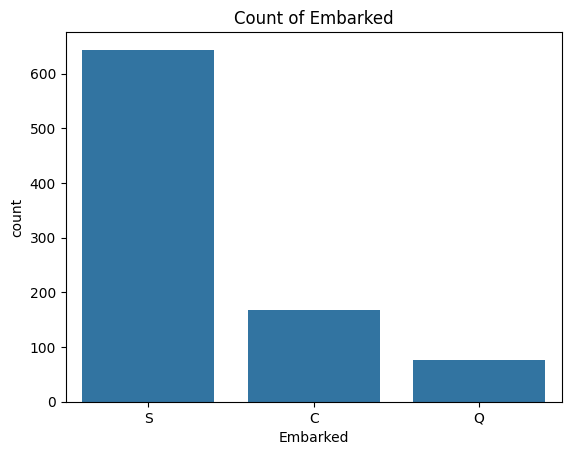

In [5]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


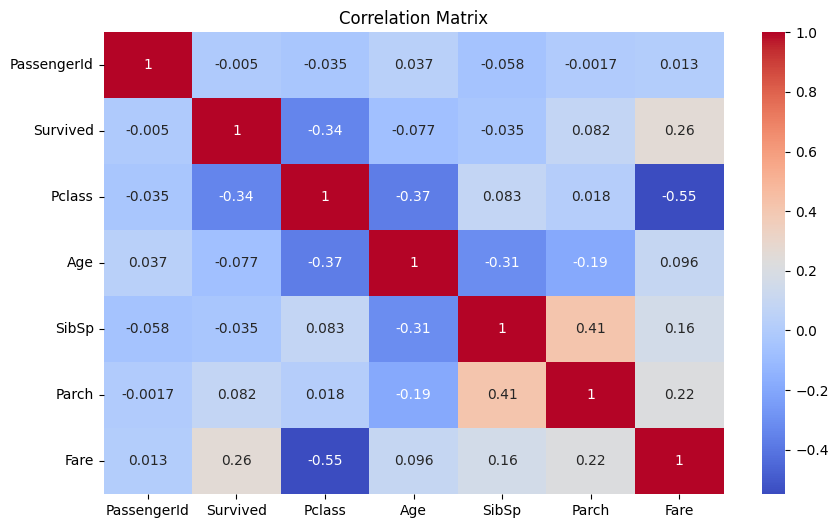

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


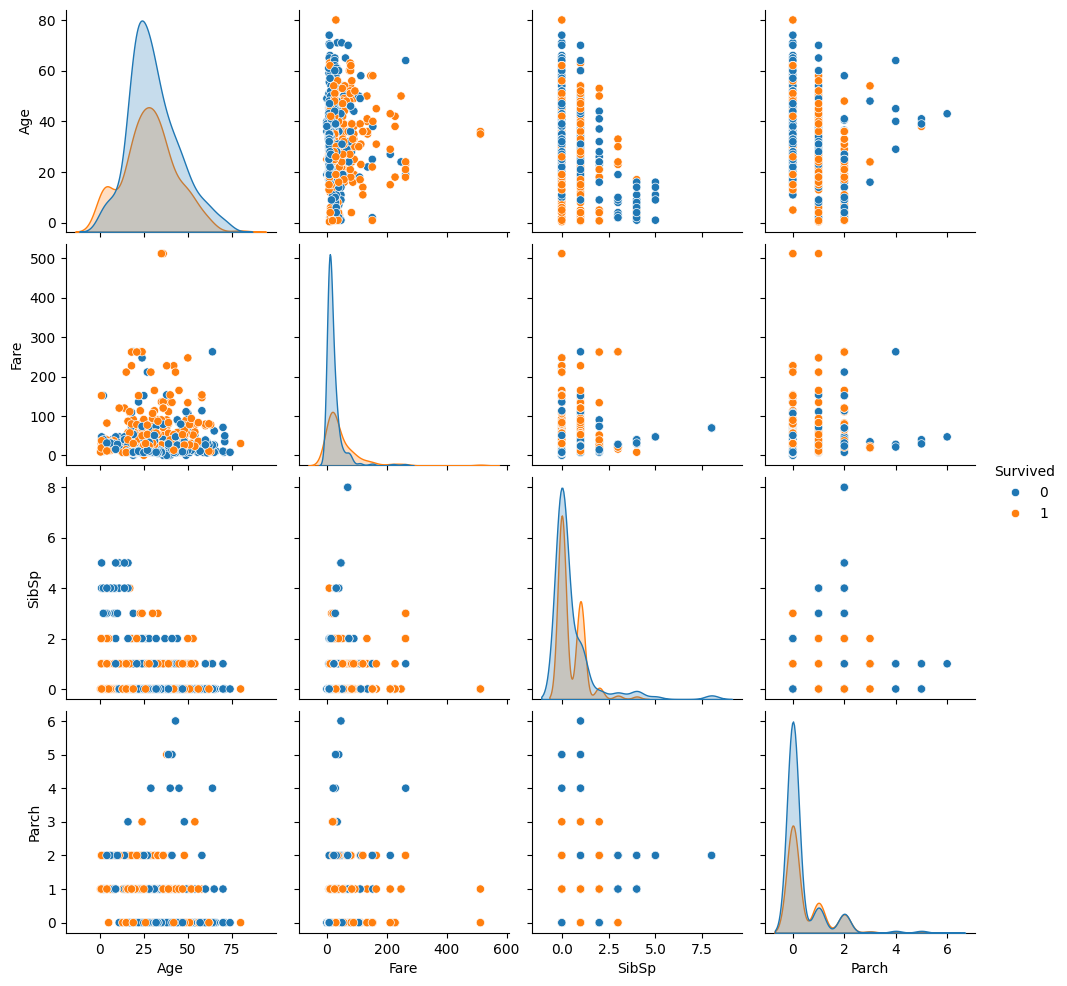

In [7]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()


In [8]:
df[numeric_cols].skew()


Age      0.389108
Fare     4.787317
SibSp    3.695352
Parch    2.749117
dtype: float64

- Fare is highly skewed, which might need log transformation.
- Age is slightly right-skewed.


In [9]:
X = df[numeric_cols].dropna()
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Value"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
vif


,Features,VIF Value
0,Age,1.142736
1,Fare,1.077250
2,SibSp,1.272323
3,Parch,1.220262


- VIF values below 5 are generally acceptable.
- Multicollinearity does not seem to be a serious concern here.


## Inferences:

1. Passengers in 1st class had higher survival rates.
2. Females had higher chances of survival.
3. Younger passengers and those with fewer family members had better survival odds.
4. Embarkation point S had the most passengers.
5. Fare shows high skewness and needs normalization if used in ML models.


In [10]:
df.to_csv("cleaned_titanic(task-2).csv", index=False)
